In [53]:
from functools import reduce
class Perceptron(object):
    def __init__(self, input_num, activator):
        '''
        初始化感知器，设置输入参数，以及激活函数。
        激活函数的类型为double->double
        '''
        self.activator = activator
        # 权重向量初始化为0
        self.weights = [0.0 for _ in range(input_num)]
        # 偏置项初始化为0
        self.bias = 0
        
    def __str__(self):
        '''
        打印学习到的权重、偏置项
        '''
        return 'weights\t:%s\nbias\t:%f' % (self.weights, self.bias)
    
    def get_wab(self):
        return self.weights, self.bias
    
    def predict(self, input_vec):
        '''
        输入向量，输出感知器的计算结果
        '''
        '''
        把input_vec[x1, x2, x3...]和weights[w1, w2, w3,...]打包在一起
        变成[(x1,w1), (x2,w2), (x3,w3), ...]
        然后利用map函数计算[x1*w1, x2*w2, x3*w3]
        最后利用reduce求和
        '''
        # print('part_list:', part_list)
        # print('input_vec:', input_vec, '\nself.weights:', self.weights)
        part_list = list(map(lambda x,w:x*w, input_vec, self.weights))
        return self.activator(
            reduce(lambda a, b: a+b, part_list, 0.0) 
            + self.bias)
    
    def train(self, input_vecs, labels, iteration, rate):
        '''
        输入训练数据：一组向量与每个向量对应的label；以及训练轮数学习率
        '''
        for i in range(iteration):
            self._one_iteration(input_vecs, labels, rate)
    
    def _one_iteration(self, input_vecs, labels, rate):
        '''
        一次迭代，把所有的训练数据过一遍
        '''
        '''
        把输入和输出打包在一起，称为样本的列表[(input_vec, label), ...]
        而每个训练样本是（input_vec, label)
        '''
        samples = zip(input_vecs, labels)
        # print('simples', input_vecs, labels)
        # 对每个样本，按照感知器规则更新权重
        for (input_vec, label) in samples:
            # 计算感知器在当前权重下的输出
            output = self.predict(input_vec)
            # 更新权重
            self._update_weights(input_vec, output, label, rate)
            
    def _update_weights(self, input_vec, output, label, rate):
        '''
        按照感知器规则更新权重
        '''
        # 把input_vec[x1, x2, x3,...]和weights[w1, w2, w3, ...]打包在一起
        # 变成[(x1,w1),(x2,w2),(x3,w3),...]
        # 然后利用感知器规则更新权重
        delta = label - output
        self.weights = list(map(lambda x, w:w+rate*delta*x, input_vec, self.weights))
        # 更新bias
        self.bias += rate * delta

In [54]:

f = lambda x:x

class LinearUnit(Perceptron):
    def __init__(self, input_num):
        Perceptron.__init__(self, input_num, f)
    
    def get_wab(self):
        return Perceptron.get_wab(self)

In [66]:
def get_training_dataset():
    # 输入5个人的收入数据
    # 输入向量列表，每一项是工作年限
    input_vecs = [[5], [3], [8], [1.4], [10.1]]
    # 期望的输出列表，月薪，注意与输入一一对应
    labels = [5500, 2300, 7600, 1800, 11400]
    return input_vecs, labels

def train_linear_unit():
    lu = LinearUnit(1)
    # 训练，迭代10轮，学习速率0.01 
    input_vecs, labels = get_training_dataset()
    lu.train(input_vecs, labels, 10, 0.01)
    return lu


linear_unit = train_linear_unit()
# 输出训练的权值
print(linear_unit)
x, y = get_training_dataset()
# print(weights, bias)
# 测试
print('Work 3.4 years, monthly salary = %.2f' % linear_unit.predict([3.4]))
print('Work 15 years, monthly salary = %.2f' % linear_unit.predict([15]))
print('Work 1.5 years, monthly salary = %.2f' % linear_unit.predict([1.5]))
print('Work 6.3 years, monthly salary = %.2f' % linear_unit.predict([6.3]))

weights	:[1124.0634970262222]
bias	:85.485289
Work 3.4 years, monthly salary = 3907.30
Work 15 years, monthly salary = 16946.44
Work 1.5 years, monthly salary = 1771.58
Work 6.3 years, monthly salary = 7167.09


/Users/optimus/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


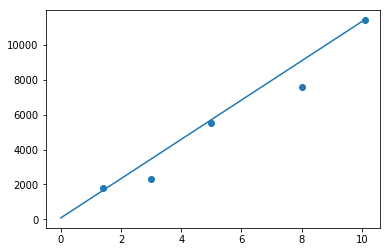

In [69]:
import matplotlib.pyplot as plt
x_t = [0, 10]
y_t = [linear_unit.predict([0]), linear_unit.predict([10])]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x, y)
ax.plot(x_t,y_t)
fig.show()